Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import folium as fm

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

Loading the dataset

In [3]:
weather = pd.read_csv('/content/SriLanka_Weather_Dataset.csv', index_col = 'time')
weather

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,20.92,...,0.0,11.7,27.4,20,4.58,7.000000,79.899994,16.0,Sri Lanka,Colombo
2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,17.71,...,1.0,13.0,27.0,24,3.84,7.000000,79.899994,16.0,Sri Lanka,Colombo
2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,17.76,...,3.0,12.3,27.4,16,3.65,7.000000,79.899994,16.0,Sri Lanka,Colombo
2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,16.50,...,0.0,17.0,34.6,356,3.79,7.000000,79.899994,16.0,Sri Lanka,Colombo
2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,23.61,...,0.0,18.7,37.1,355,4.97,7.000000,79.899994,16.0,Sri Lanka,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,63,29.2,24.7,26.6,35.4,29.2,31.6,2023-06-13T00:24,2023-06-13T12:55,17.20,...,23.0,15.6,43.6,229,3.41,6.900002,80.000000,20.0,Sri Lanka,Oruwala
2023-06-14,61,29.1,25.4,26.9,34.3,30.4,32.0,2023-06-14T00:24,2023-06-14T12:55,14.97,...,19.0,16.4,40.0,224,3.00,6.900002,80.000000,20.0,Sri Lanka,Oruwala
2023-06-15,51,29.8,25.5,27.3,36.6,30.7,32.7,2023-06-15T00:24,2023-06-15T12:56,15.89,...,17.0,12.6,32.4,218,3.21,6.900002,80.000000,20.0,Sri Lanka,Oruwala


In [4]:
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]
null_percentage
#the null percentage is zero in every coloumn. so the dataset is already cleaned, no need to clean it

,0
weathercode,0.0
temperature_2m_max,0.0
temperature_2m_min,0.0
temperature_2m_mean,0.0
apparent_temperature_max,0.0
apparent_temperature_min,0.0
apparent_temperature_mean,0.0
sunrise,0.0
sunset,0.0
shortwave_radiation_sum,0.0


In [5]:
weather.index

Index(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
       '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10',
       ...
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
       '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17'],
      dtype='object', name='time', length=147480)

In [6]:
#converting the index's type into date-time
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17'],
              dtype='datetime64[ns]', name='time', length=147480, freq=None)

Visualize the Map of weather data collected cities

In [7]:
cities = weather['city'].unique()
cities = pd.DataFrame({'Cities': cities})
cities

,Cities
0,Colombo
1,Mount Lavinia
2,Kesbewa
3,Moratuwa
4,Maharagama
5,Ratnapura
6,Kandy
7,Negombo
8,Sri Jayewardenepura Kotte
9,Kalmunai


In [8]:
latitudes = []
longitudes = []

for i in range(len(cities)):
  lat = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
  lng = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
  latitudes.append(lat)
  longitudes.append(lng)

cities['latitude'] = latitudes
cities['longitude'] = longitudes
cities

,Cities,latitude,longitude
0,Colombo,7.000000,79.899994
1,Mount Lavinia,6.900002,79.899994
2,Kesbewa,6.800003,79.899994
3,Moratuwa,6.800003,79.899994
4,Maharagama,6.800003,79.899994
5,Ratnapura,6.800003,80.300020
6,Kandy,7.300003,80.600006
7,Negombo,7.099998,79.899994
8,Sri Jayewardenepura Kotte,6.900002,79.899994
9,Kalmunai,7.400002,81.800020


In [35]:
#create & display the map
map_sl= fm.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)


for idx, row in cities.iterrows():
    fm.Circle(location = [row['latitude'], row['longitude']],
                  radius = 2000, color = 'blue',
              ).add_child(fm.Popup(row['Cities'])).add_to(map_sl)

map_sl

Visualizing data for Matara ( Sri Lanka )

In [10]:
weather_matara = weather[weather['city'] == 'Matara']

In [11]:
#dropping unnecessary columns
weather_matara = weather.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise',
                                         'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude',
                                         'latitude', 'elevation'])
weather_matara.head()

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,city
time,,,,,,,,,,,,
2010-01-01,2,26.1,29.2,20.92,0.0,0.0,0.0,11.7,27.4,20,4.58,Colombo
2010-01-02,51,26.2,29.8,17.71,0.1,0.1,1.0,13.0,27.0,24,3.84,Colombo
2010-01-03,51,26.0,29.9,17.76,0.6,0.6,3.0,12.3,27.4,16,3.65,Colombo
2010-01-04,2,25.3,27.8,16.50,0.0,0.0,0.0,17.0,34.6,356,3.79,Colombo
2010-01-05,1,24.5,26.1,23.61,0.0,0.0,0.0,18.7,37.1,355,4.97,Colombo


In [12]:
annual_rainfall = weather_matara.groupby([weather_matara.index.year ,
                                          weather_matara.index.month]).rain_sum.sum()

annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2010, 2015, 2020]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()


Text(0.5, 1.0, 'Monthly rainfall from 2010 to 2020 in Matara')

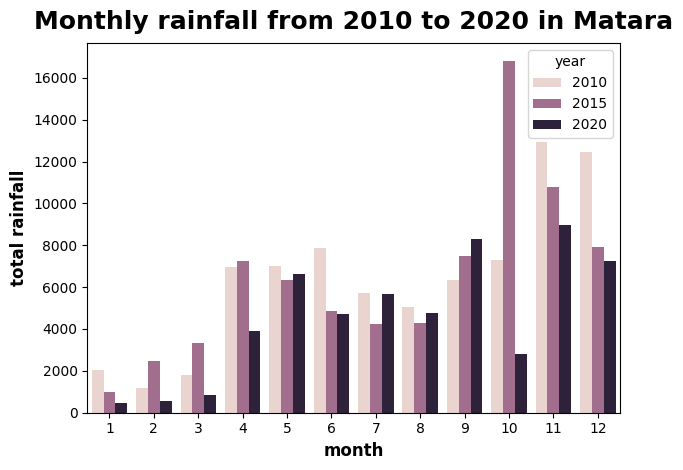

In [13]:
#plotting the data

sns.barplot( x = 'month', y = 'total rainfall', hue ='year',
            data = monthly_rainfall_by_year)
plt.title('Monthly rainfall from 2010 to 2020 in Matara')

Visualizing average temperature in Matara

In [14]:
weather_matara = weather_matara.sort_index() #sorting the indexes in ascending order (if index are not sorted we cannot partially slice by index)
average_temp = weather_matara.loc['2020-01-01':'2022-12-31']['temperature_2m_mean']

Text(0, 0.5, 'Average Temperature')

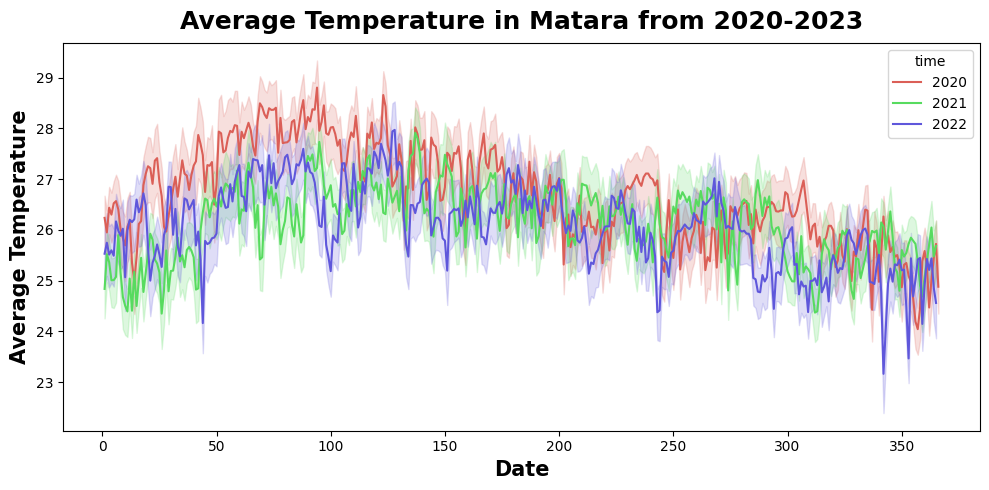

In [15]:
#plotting

figure = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=average_temp.index.dayofyear, y=average_temp, hue=average_temp.index.year,
            palette=palette,);

plt.title('Average Temperature in Matara from 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Temperature', fontsize=15)

Weather Predictions

In [18]:
#seasonal forecasting using fourier feautres (predicitons)

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


In [19]:
#creating model for prediction
fourier = CalendarFourier(freq='A', order=10)

X = fourier.in_sample(average_temp.index)
y = average_temp
model = LinearRegression()
model.fit(X,y)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


LinearRegression()

In [20]:
y_pred = pd.Series(model.predict(X), index = y.index)
X_fourier = fourier.out_of_sample(steps = 560, index = pd.date_range("2020-01-01", "2022-12-31", freq="D"))
y_fourier =  pd.Series(model.predict(X_fourier), index=X_fourier.index)

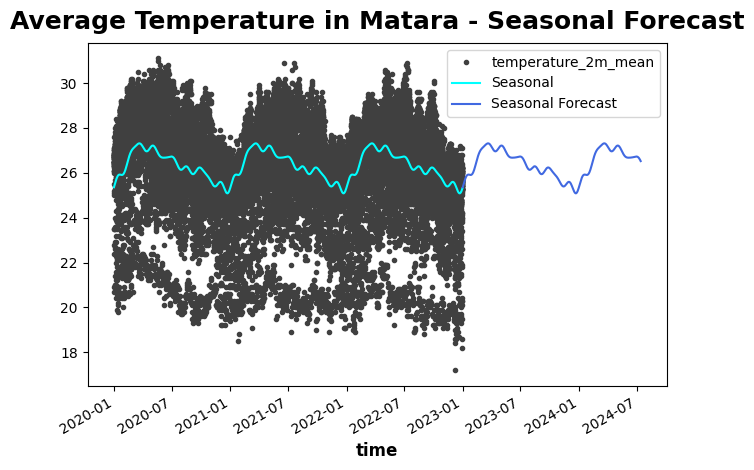

In [21]:
ax = y.plot(color='0.25', style='.', title="Average Temperature in Matara - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fourier.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

In [27]:
#rainfall visualzing

rainfall = weather_matara.loc['2020-01-01': '2022-12-31']['rain_sum']


Text(0, 0.5, 'Total Rainfall')

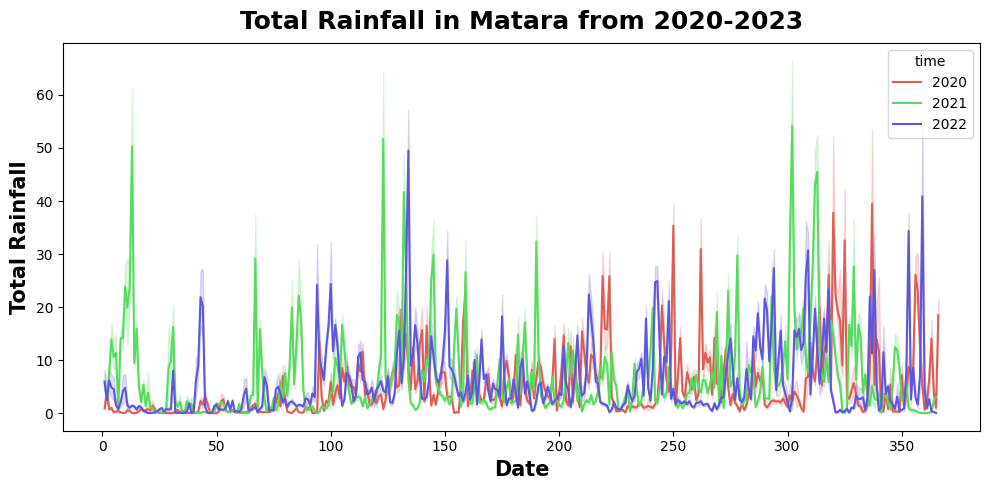

In [28]:
figure1 = plt.subplots(figsize=(10,5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x= rainfall.index.dayofyear, y = rainfall, hue = rainfall.index.year,
             palette = palette)

plt.title('Total Rainfall in Matara from 2020-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)


In [29]:
#Rainfall predictions

fourier = CalendarFourier(freq = 'A', order = 18)
X = fourier.in_sample(rainfall.index)
y = rainfall
model = LinearRegression()
model.fit(X,y)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


LinearRegression()

In [34]:
y_pred_r = pd.Series(model.predict(X), index = y.index)
X_fourier_r = fourier.out_of_sample(steps = 600 , index = pd.date_range("2020-01-01", "2022-12-31", freq="D"))
y_fourier_r = pd.Series(model.predict(X_fourier_r), index = X_fourier_r.index)

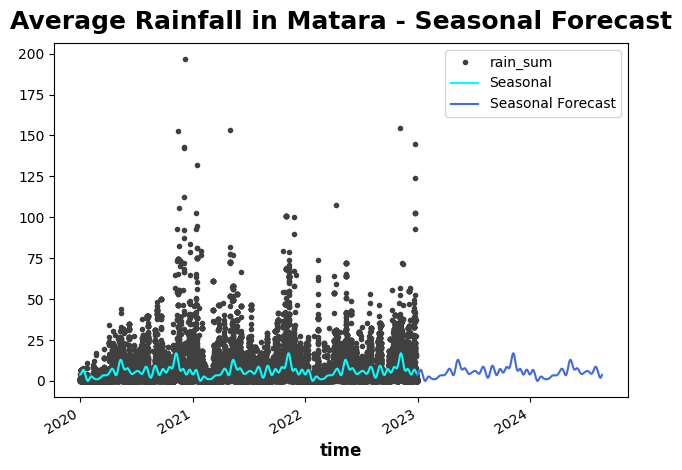

In [33]:
#plotting

ax = y.plot(color='0.25', style='.', title="Average Rainfall in Matara - Seasonal Forecast")
ax = y_pred_r.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fourier_r.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
ax.legend()